In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
base_dir  = '/content/drive/MyDrive/Datasets2'
print(os.listdir(base_dir))

Mounted at /content/drive
['proses', 'h5']


In [ ]:
base_proses = base_dir+'/proses'
print(os.listdir(base_proses))

['spectogram_dewasa', 'spectogram_anak']


In [ ]:
HEIGTH_IMAGE = 216
WIDHT_IMAGE = 216
EPOCHS = 100
CLASS = 2
BATCH_SIZE = 10
learning_rate = 1e-5

# bagus
# epoch = 50
# lr = 1e-5

In [ ]:
import keras.utils as image
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam,RMSprop
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout,Activation
from keras import regularizers
from keras.applications import MobileNetV2,VGG16
from keras.applications.vgg16 import preprocess_input

In [ ]:
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(HEIGTH_IMAGE, WIDHT_IMAGE, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

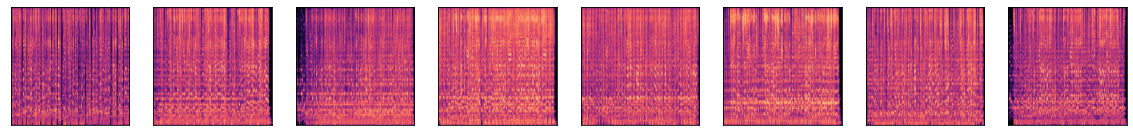

In [ ]:
images, labels = load_images_from_path(base_proses+'/spectogram_dewasa', 0)
show_images(images)
    
x += images
y += labels

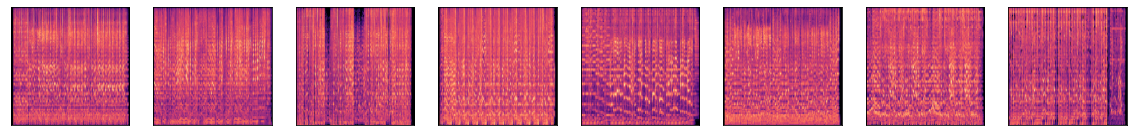

In [ ]:
images, labels = load_images_from_path(base_proses+'/spectogram_anak', 1)
show_images(images)
    
x += images
y += labels

In [ ]:

# x= data
# y= label

# Train-val-test split of files
train_files, test_files, train_labels, test_labels = train_test_split(x,y, random_state = 42, test_size = 0.2)

# Among the test files, keep half for validation
val_files, test_files, val_labels, test_labels = train_test_split(test_files, test_labels,random_state = 42, test_size = 0.1)

x_train_norm = np.array(train_files) / 255
x_test_norm = np.array(val_files) / 255

y_train_encoded = to_categorical(train_labels)
y_test_encoded = to_categorical(val_labels)

# khusus buat testing
testing_data =  np.array(test_files) / 255
label_testing =  to_categorical(test_labels)

In [ ]:
# print(x_train_norm)
# print(x_test_norm)
print(test_labels)

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [ ]:
print('jumlah data training =', len(train_files))
print('jumlah data validasi =', len(val_files))
print('jumlah data testing =', len(test_files))


jumlah data training = 1112
jumlah data validasi = 250
jumlah data testing = 28


In [ ]:
print('jumlah data training = ', x_train_norm.shape)
print('jumlah data validasi = ', x_test_norm.shape)
print('jumlah data testing = ', testing_data.shape)

print()
print('jumlah label training = ', y_train_encoded.shape)
print('jumlah label validasi = ', y_test_encoded.shape)
print('jumlah label testing = ', label_testing.shape)



jumlah data training =  (980, 216, 216, 3)
jumlah data validasi =  (378, 216, 216, 3)
jumlah data testing =  (43, 216, 216, 3)

jumlah label training =  (980, 2)
jumlah label validasi =  (378, 2)
jumlah label testing =  (43, 2)


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(WIDHT_IMAGE, HEIGTH_IMAGE, 3))
x_train_norm = preprocess_input(np.array(train_files))
x_test_norm = preprocess_input(np.array(val_files))
train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)
# base_model.summary()
testing_data = preprocess_input(np.array(test_files))
testing_features =  base_model.predict(testing_data)
label_testing =  to_categorical(test_labels)

1/1 [==============================] - 2s 2s/step


In [ ]:
# optimizer = Adam(learning_rate=learning_rate)
optimizer = RMSprop(learning_rate=learning_rate)

model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(512, name='dense_1', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(rate=0.3, name='dropout_1')) # Can try varying dropout rates
model.add(Activation(activation='relu', name='activation_1'))
model.add(Dense(2, activation='softmax', name='dense_output'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense_1 (Dense)             (None, 512)               9437696   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_output (Dense)        (None, 2)                 1026      
                                                                 
Total params: 9,438,722
Trainable params: 9,438,722
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [ ]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=BATCH_SIZE, epochs=EPOCHS)


Epoch 1/100
112/112 [==============================] - 2s 10ms/step - loss: 4.3779 - accuracy: 0.5926 - val_loss: 2.0086 - val_accuracy: 0.7520
Epoch 2/100
112/112 [==============================] - 1s 8ms/step - loss: 2.9707 - accuracy: 0.7077 - val_loss: 1.4971 - val_accuracy: 0.8280
Epoch 3/100
112/112 [==============================] - 1s 8ms/step - loss: 2.3854 - accuracy: 0.7509 - val_loss: 2.2719 - val_accuracy: 0.7000
Epoch 4/100
112/112 [==============================] - 1s 8ms/step - loss: 1.7553 - accuracy: 0.8076 - val_loss: 1.2204 - val_accuracy: 0.8720
Epoch 5/100
112/112 [==============================] - 1s 8ms/step - loss: 1.4246 - accuracy: 0.8381 - val_loss: 1.1075 - val_accuracy: 0.8640
Epoch 6/100
112/112 [==============================] - 1s 8ms/step - loss: 1.1939 - accuracy: 0.8552 - val_loss: 1.2144 - val_accuracy: 0.8320
Epoch 7/100
112/112 [==============================] - 1s 8ms/step - loss: 0.9868 - accuracy: 0.8894 - val_loss: 1.0106 - val_accuracy: 0.868

In [ ]:
model.evaluate(testing_features , label_testing , batch_size = 10)

3/3 [==============================] - 0s 6ms/step - loss: 0.1690 - accuracy: 0.9643


[0.16897988319396973, 0.9642857313156128]

In [ ]:
model.save(base_dir+'/h5/model6_vgg16.h5')

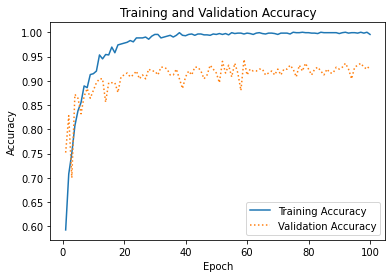

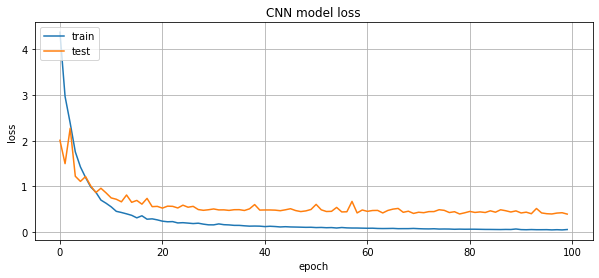

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

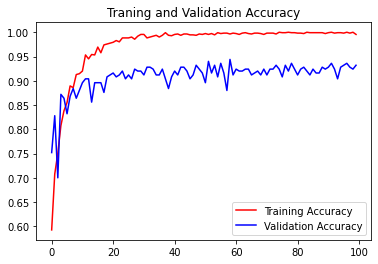

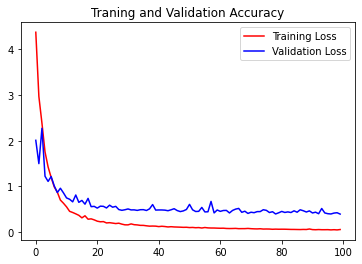

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("Traning and Validation Accuracy")
plt.legend(loc = 'best')
plt.show()


plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Traning and Validation Accuracy")
plt.legend(loc = 'best')
plt.show()


1/1 [==============================] - 0s 51ms/step


Text(89.18, 0.5, 'Actual label')

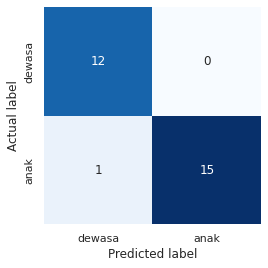

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
sns.set()

y_predicted = model.predict(testing_features)
# print(y_predicted.argmax(axis=1))
# print(label_testing.argmax(axis=1))

mat = confusion_matrix(label_testing.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['dewasa', 'anak']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
report = classification_report(label_testing.argmax(axis=1), y_predicted.argmax(axis=1))
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.94      0.97        16

    accuracy                           0.96        28
   macro avg       0.96      0.97      0.96        28
weighted avg       0.97      0.96      0.96        28



In [ ]:
#testing dewasa

In [ ]:
dir_testing = base_dir+'/testing'
spectogram_dewasa = dir_testing+'/spectogram_dewasa'
print(os.listdir(spectogram_dewasa))

[]


In [ ]:

x = image.load_img(spectogram_dewasa+'/y2mate.com - Glenn Fredly  Sedih Tak Berujung Video Clip.png', target_size=(WIDHT_IMAGE, WIDHT_IMAGE))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

FileNotFoundError: ignored

In [ ]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 [==============================] - 0s 34ms/step
dewasa: 1.0
anak: 4.325801583604516e-08


In [ ]:
#testing anak

In [ ]:
dir_testing = base_dir+'/testing'
spectogram_anak = dir_testing+'/spectogram_anak'
print(os.listdir(spectogram_anak))

['y2mate.com - AYO MAKAN BERSAMA  SEBELUM KITA MAKAN  CIPTAAN PAK KASUR.png', 'y2mate.com - Jane Callista  Ayo Ceria.png', 'y2mate.com - Lagu AnakAnak Indonesia  Hallo Raksasa  Didi  Friends Indonesia.png', 'y2mate.com - Lagu Anak Anak  Belanja bersama Mama.png', 'y2mate.com - Lagu Anak Anak  Sulap  BaLiTa.png', 'y2mate.com - Lagu Anak Indonesia  Belajar Berdoa bersama Diva  Kastari Animation Official.png', 'y2mate.com - Lagu Anak Islami   5 WAKTU SHALAT.png', 'y2mate.com - Lagu Anak Terbaru 2016  Jangan Kau Lupa  Bibitsku.png', 'y2mate.com - Lagu Kanak Kanak TV  Bintang Bintang  Twinkle Twinkle Little Star in Bahasa Melayu.png', 'y2mate.com - NUSSA  BULAN HIJRIAH PENUH BERKAH.png', 'y2mate.com - PLANET MERKURIUS  Lagu Anak 3D Kastari Animation Official.png', 'y2mate.com - Roda Mobil Bis Berputar Wheels on the bus  Lagu Anak Indonesia.png', 'y2mate.com - Upin  Ipin  Lagu Pisang Goreng Ngap Ngap SingAlong.png', 'y2mate.com - TARI TEPUK TANGAN CIPTAAN PAK KASUR  Lagu Anak Tema 2 Kelas 1 

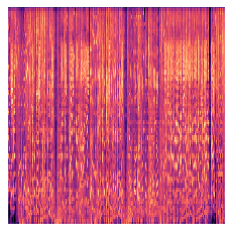

In [ ]:

x = image.load_img(spectogram_anak+'/y2mate.com - Lagu AnakAnak Indonesia  Hallo Raksasa  Didi  Friends Indonesia.png', target_size=(WIDHT_IMAGE, HEIGTH_IMAGE))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [ ]:
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

y = base_model.predict(x)
predictions = model.predict(y)
print(predictions)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 [==============================] - 0s 28ms/step
[[0.13297051 0.8670295 ]]
dewasa: 0.13297051191329956
anak: 0.8670294880867004


Saving y2mate.com - Nella Kharisma feat  Cak Roel  Salah Tompo Official Music Videos.png to y2mate.com - Nella Kharisma feat  Cak Roel  Salah Tompo Official Music Videos.png
1/1 [==============================] - 0s 18ms/step
dewasa: 0.9995131492614746
anak: 0.00048683909699320793


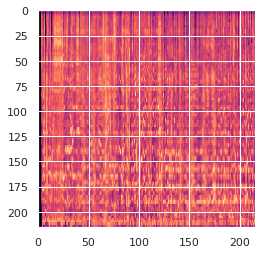

In [ ]:
import numpy as np
import keras.utils as image
%matplotlib inline
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(WIDHT_IMAGE,HEIGTH_IMAGE))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  # print(x)
  y = base_model.predict(x)
  predictions = model.predict(y)
  
for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')